In [122]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y = True)

In [123]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [126]:
pd.DataFrame(y).value_counts()

1    71
0    59
2    48
dtype: int64

In [127]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

#### Printing the decision tree

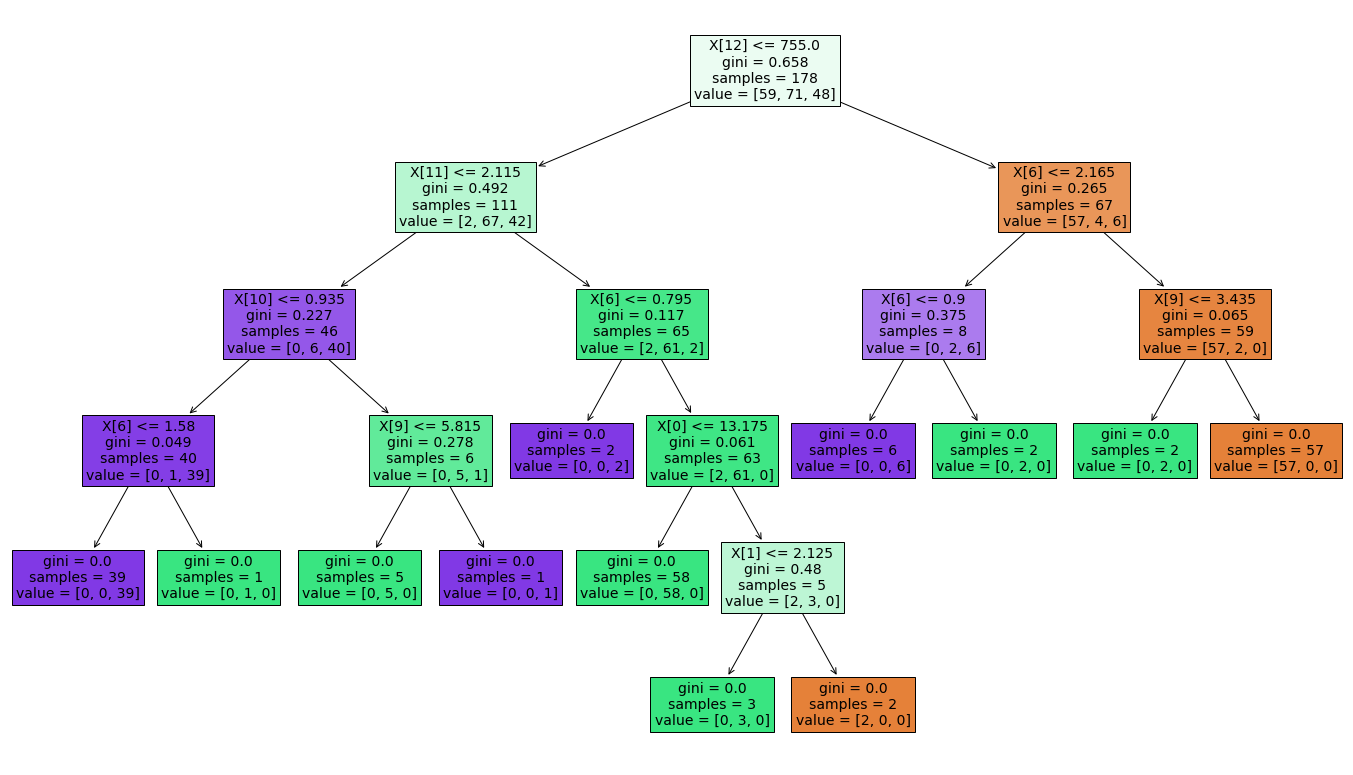

In [128]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24,14))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

The model keeps splitting the nodes until all the nodes are pure (i.e. contain samples from only one class).

We usually do not want a tree with all pure leaf nodes. It would be too specific and likely to overfit.

# Hyperparameters 

#### min_impurity_decrease

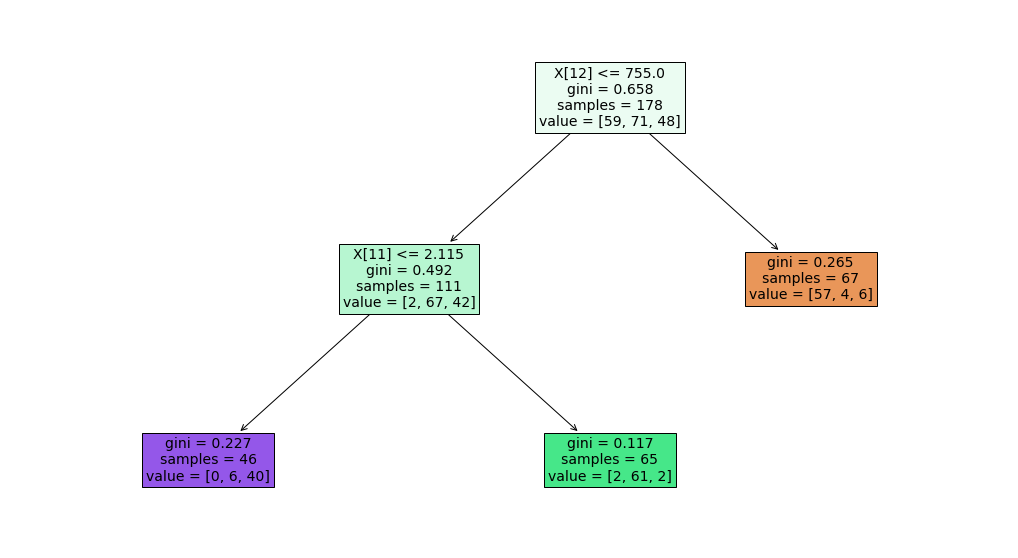

In [129]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

We now have a much smaller tree. Consider the green node at the bottom. It contains 65 samples and 61 of them belong to one class. There is no need to further split that node because we can afford to have 4 misclassified samples out of 65. If we keep splitting that node, the model will probably be overfitting.¶ Another hyperparameter to control the depth of a tree is max_depth.

It does not make any calculations regarding impurity or sample ratio.

The model stops splitting when max_depth is reached.

#### max_depth

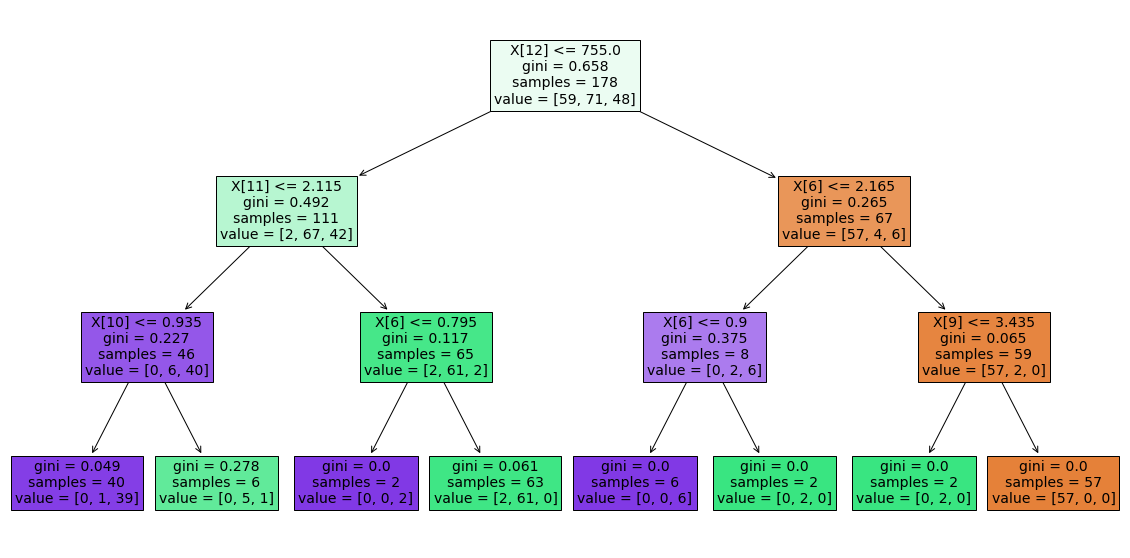

In [131]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

#### min_samples_leaf - 

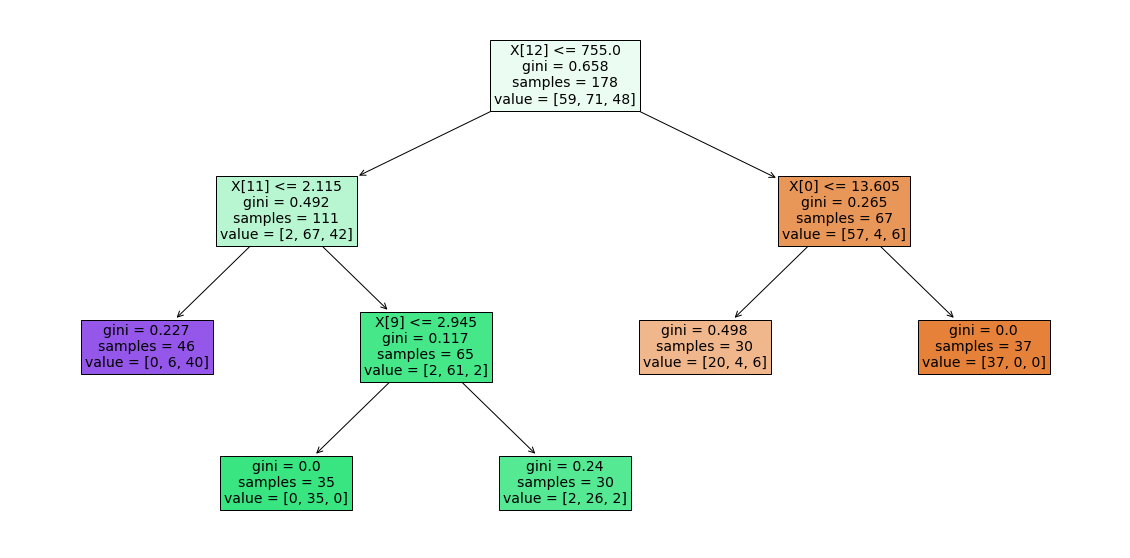

In [136]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=30)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

#### max_leaf_nodes

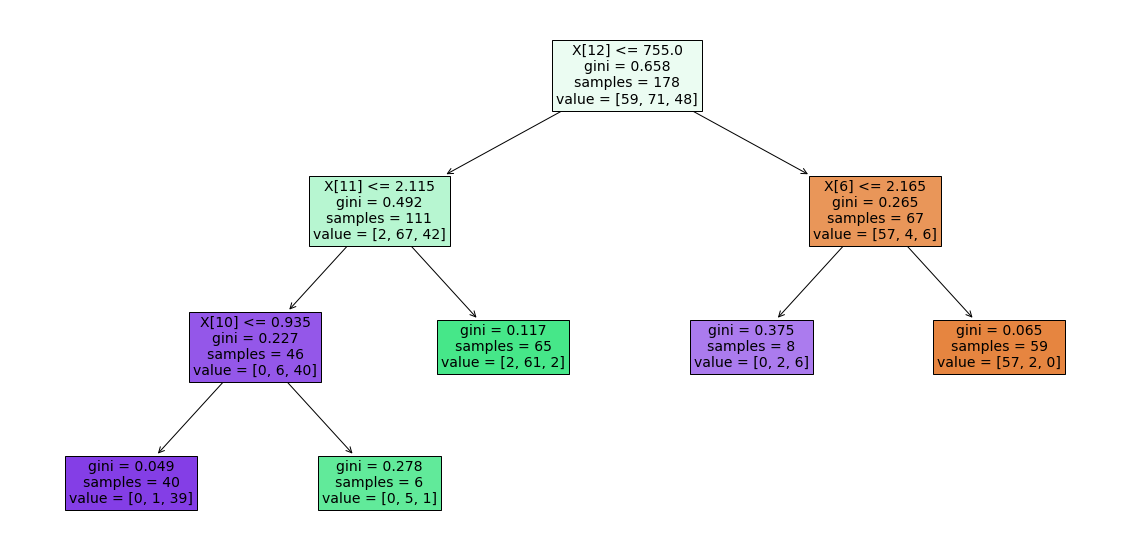

In [137]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)
plt.show()

# Decision Tree Use Case

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/susanli2016/Machine-Learning-with-Python/master/HR.csv')

In [9]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
df.sales.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [11]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [12]:
df=df.rename(columns = {'sales':'department'})

In [13]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [14]:

import numpy as np
df['department']=np.where(df['department'] =='support', 'technical', df['department'])
df['department']=np.where(df['department'] =='IT', 'technical', df['department'])

In [15]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'management',
       'product_mng', 'marketing', 'RandD'], dtype=object)

# Create dummy variables for categorical variables

There are two categorical variables in the dataset and they need to be converted to dummy variables before they can be used for modelling.

In [16]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1

In [17]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,...,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,0,1,0,0,1,0


In [18]:
df.drop(df.columns[[8, 9]], axis=1, inplace=True)

In [19]:
df_vars=df.columns.values.tolist()
y=['left']
X=[i for i in df_vars if i not in y]

In [20]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(df[X], df[y])
print(rfe.support_)
print(rfe.ranking_)

C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\skesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [21]:
cols = []
for i in range(len(X)):    
    if rfe.ranking_[i] == 1:
               cols.append(X[i])
cols

['satisfaction_level',
 'last_evaluation',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_RandD',
 'department_hr',
 'department_management',
 'salary_high',
 'salary_low']

In [22]:
X=df[cols]
y=df['left']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



In [26]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

print(classification_report(y_test, tree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3462
           1       0.91      0.96      0.93      1038

    accuracy                           0.97      4500
   macro avg       0.95      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



In [27]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import RandomizedSearchCV 

In [28]:
# Creating the hyperparameter grid  
param_dist = {"max_depth": [3,4,5,6,7], 
              "max_features": [3,4,5,6,7,8,9,10], 
              "min_samples_leaf": [1,23,4,5,6,7,8,9,10], 
              "criterion": ["gini", "entropy"]} 

# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 

# Instantiating RandomizedSearchCV object 
tree_cv = RandomizedSearchCV(tree, param_dist,n_iter=200, cv = 5) 

tree_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_)) 
print("Best score is {}".format(tree_cv.best_score_)) 

{'max_depth': [3, 4, 5, 6],
 'max_features': [3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [1, 23, 4, 5, 6, 7, 8, 9, 10],
 'criterion': ['gini', 'entropy']}

In [37]:
pd.DataFrame(tree_cv.cv_results_)[['mean_test_score','params']]

,mean_test_score,params
0,0.951929,"{'min_samples_leaf': 7, 'max_features': 10, 'm..."
1,0.927929,"{'min_samples_leaf': 8, 'max_features': 8, 'ma..."
2,0.909793,"{'min_samples_leaf': 23, 'max_features': 8, 'm..."
3,0.924261,"{'min_samples_leaf': 4, 'max_features': 3, 'ma..."
4,0.902591,"{'min_samples_leaf': 23, 'max_features': 4, 'm..."
...,...,...
195,0.951929,"{'min_samples_leaf': 23, 'max_features': 10, '..."
196,0.919529,"{'min_samples_leaf': 23, 'max_features': 3, 'm..."
197,0.957663,"{'min_samples_leaf': 1, 'max_features': 9, 'ma..."
198,0.955596,"{'min_samples_leaf': 10, 'max_features': 6, 'm..."


In [38]:
tree_cv.best_params_

{'min_samples_leaf': 5,
 'max_features': 9,
 'max_depth': 6,
 'criterion': 'entropy'}

In [105]:
print(classification_report(y_test, tree_cv.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3462
           1       0.92      0.92      0.92      1038

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



In [106]:
import math 
import random

#### Entropy

In [107]:
from math import log

In [108]:
def entropy(base,a,b):
    
    try:
        var =  -(((a)/(a+b)) * log(((a)/(a+b)),base)) - (((b)/(a+b)) * log(((b)/(a+b)),base))
        return var
    
    except (ValueError):
        return 0

In [109]:
ent_list = []
blue_list = []
red_list = []
blue_prob_list = []

In [110]:

for x in range (1000):
    
    blue = int(random.uniform(0, 40)) #picking a random number between 0-40
    
    red = abs(40-blue) # red balls
    
    a = entropy(2,red,blue) # calculate entropy of the dataset
    
    b = blue/(blue+red) # probability of bluw
    
    ent_list.append(a) # collecting all the entropy in a list
    
    blue_list.append(blue) # collecting all the probability in list
    
    red_list.append(red)
    
    blue_prob_list.append(b)


df = pd.DataFrame({"Blue": blue_list, "Red": red_list,"Entropy": ent_list, "Probability of Blue": blue_prob_list})
df = df[['Red', 'Blue', 'Probability of Blue', 'Entropy']]
df

,Red,Blue,Probability of Blue,Entropy
0,23,17,0.425,0.983708
1,40,0,0.000,0.000000
2,38,2,0.050,0.286397
3,16,24,0.600,0.970951
4,19,21,0.525,0.998196
...,...,...,...,...
995,30,10,0.250,0.811278
996,40,0,0.000,0.000000
997,17,23,0.575,0.983708
998,24,16,0.400,0.970951


In [111]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Entropy Curve')

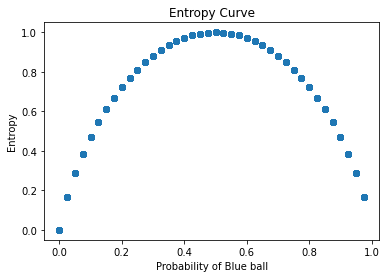

In [112]:
plt.scatter(blue_prob_list,ent_list)
plt.xlabel('Probability of Blue ball')
plt.ylabel('Entropy')
plt.title('Entropy Curve')

In [113]:
entropy(2,339,338) # TOO MUCH DISORDER

0.999998426135412

In [114]:
entropy(2,339,2) # ORDERED

0.051918380627631176

#### Gini Index

In [115]:
def gini(a,b):
    
    a1 = (a/(a+b))**2
    
    b1 = (b/(a+b))**2
    
    return 1 - (a1 + b1)

In [116]:
#Blank Lists
gini_list = []
blue_list = []
red_list = []
blue_prob_list2 = []

In [117]:

for x in range (1000):
    
    blue = int(random.uniform(0, 40))
    
    red = abs(40-blue)
    
    a = gini(red,blue)
    
    b = blue/(blue+red)
    
    a = gini(red,blue)
    
    b = blue/(blue+red)
    
    gini_list.append(a)
    
    blue_list.append(blue)
    
    red_list.append(red)
    
    blue_prob_list2.append(b)



In [118]:
#Dataframe of amount of blue, red, Probability of blue, and gini score
df = pd.DataFrame({"Blue": blue_list, "Red": red_list,"Gini Score": gini_list, "Probability of Blue": blue_prob_list2})
df = df[['Red', 'Blue', 'Probability of Blue', 'Gini Score']]
df

,Red,Blue,Probability of Blue,Gini Score
0,11,29,0.725,0.39875
1,35,5,0.125,0.21875
2,5,35,0.875,0.21875
3,17,23,0.575,0.48875
4,9,31,0.775,0.34875
...,...,...,...,...
995,6,34,0.850,0.25500
996,26,14,0.350,0.45500
997,22,18,0.450,0.49500
998,39,1,0.025,0.04875


Text(0.5, 1.0, 'Gini Curve')

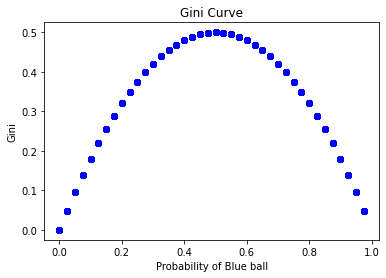

In [119]:
plt.scatter(blue_prob_list2,gini_list,c='blue')
plt.xlabel('Probability of Blue ball')
plt.ylabel('Gini')
plt.title('Gini Curve')

In [120]:
gini(200,11) # Ordered

0.09882976572853264

In [121]:
gini(200,170) # Highly unordered

0.4967129291453616

In [ ]:
Ensemble Models > Decision Tress > Logistic regression 

DT might overfit

In [1]:

t =['Analytical R&D-API', 'Discovery Services', 'Analytical R&D-Formulations', 'Process Development, BRaIN', 'Microbiology', 'NBE Services', 'Product Development 1, API', 'SCCAE', 'Technology Transfer, OSD', 'Formulation R&D, BRaIN', 'Product Development 1, OSD', 'FR&D ILOS, BRaIN', 'Oral Solid Dosage', 'NA Finance', 'Process R&D, API', 'SMT', 'Taxation', 'Upstream', 'CTO Central SHE', 'Formulations R&D, Injectable', 'API Analytical Research & Development', 'AR&D Delivery, Injectable', 'Analytical R&D-GLP', 'AR&D Delivery, Inhalation', 'Clinical Strategy', 'CoE Formulations, BRaIN', 'Project Management, Injectable', 'SuCCEED', 'Admin, CSR & Liasoning', 'CSV', 'OSD PRODUCTION', 'Regulatory Affairs - API', 'Central Manufacturing Office', 'CEO Office', 'Quality By Design', 'Quality Control - Chemical', 'Production  Manufacturing  Operations', 'Analytical R&D, BRaIN', 'GGPM', 'Production Area IV', 'Safety, Health & Environment', 'Process Enginnering, API', 'Characterization, Injectable', 'MSAT -Process Engineering', 'Pilot Plant, OSD', 'DLT OSD & Injectable', 'Delivery Planning', 'Safety, Health & Environm', 'Safety,Health & Environment', 'Business Development', 'Peptide Chemistry', 'CTO 1 HR', 'Production-Planning', 'Filing to Commercial Launch', 'Process Development, OSD', 'Project Engineering', 'Quality Control - Micro', 'Head', 'Central Engineering - CTO', 'Cell & Molecular Biology', 'Polymorph Screening, API', 'INJECTABLE', 'Clinical Pharmacokinetics', 'Quality Control', 'Process Engineering', 'Power Generation', 'Finance', 'IPM-API', 'Production - OSD', 'Facilities Management & Real Estate', 'Engineering & Maintenance', 'Digital Process Excellence', 'Production - Packing', 'Analytical R&D, API', 'Delivery CTO I & II', 'Process Research & Development', 'Formulations AR&D', 'MES CoE', 'Continuous Improvement', 'Sales  Marketing', 'ComplexLiposomes', 'CTO-Projects', 'DMPK', 'Product Development, BRaI', 'SEZ-Projects', 'CoE Formulations, OSD', 'Chemistry', 'IPM-Oral Solids', 'MSAT-Process Chemistry', 'Injectables', 'Oncology  Opthalmics', 'Launch Program Management- Hyderabad', 'Deficiency Management, Injectable', 'Central Planning', 'Biostatistics & Data Management', 'Production', 'Planning', 'Quality Control-Chemical', 'Medicinal Chemistry', 'Delivery CTO VI', 'External Technical Services', 'FTO Unit II', 'Analytical R&D', 'Launch Program Management- Vizag', 'Detail&Commissioning Engineering', 'FTO 2- Admin', 'Packaging Operations', 'HTAT Team', 'FR&D CoE FML, BRaIN', 'Production - Injectable', 'PAT, API', 'Quality Assurance', 'OINTMENT', 'Talent Acquisition', 'Safety Health & Environment', 'Bio Analytical - Bioequivalence', 'AR&D ILOS, BRaIN', 'SCM Strategy & Analytics', 'Strategy and Planning', 'Process R&D', 'Capacity & capability Assurance', 'Liason', 'FTO Unit 12', 'Formulation R&D, Injectable', 'Analytical Science & Technology', 'API Analytical R&D', 'Packaging Development', 'Human Resource', 'Developmental Quality Assurance', 'Product Development 2, OSD', 'Capital & MRO', 'CTO 2 HR', 'Strategic Sourcing', 'Branded Formulations', 'Intellectual Property Management', 'Pharmacology', 'CTO 3 HR', 'Global Sourcing', 'Knowledge Management', 'Plant Process Engineering', 'Human Resource - IPDO', 'Quality Control CPS Kilolab', 'CIP-AVD', 'DLT, OSD', 'Preclinical', 'SCM', 'Production CPS Kilolab', 'AR&D Delivery, OSD', 'Packing', 'Marketing', 'Formulations Research & Development', 'Warehouse', 'Plant Support Group', 'Capex Evaln & Fixed Asset Mgt Team', 'Process Engineering Research', 'Production Area II', 'GPID', 'Projects', 'Administration', 'CTO Projects & Engineering', 'Product Development 2, API', 'Formulation R&D DLT, OSD', 'Process Innovation', 'Molecular Biology', 'Kilo Lab, API', 'T&P Analytical', 'Analytical R&D, OSD', 'PR&D', 'Production Area III', 'Production-Packing', 'Legal & Compliance', 'IPM-Inhalation', 'Rheology, Injectable', 'Bioassay Lab', 'AR&D CoE FML, OSD', 'Analytical Research and Development', 'Global Quality & Regulatory Affairs', 'Project Management System', 'Program Management', 'New Technology, API', 'Pilot Plant', 'Clinical Development', 'Microbiology and Bioassay Lab', 'Analytical Development', 'Regulatory Affairs', 'BioPharmacuetics', 'Oligonucleotides', 'OpsNext', 'Engineering Services Department', 'Corporate Quality Control', 'CPP, API', 'Vendor Support Lab', 'Digital and Process Excellence', 'Liaison', 'Plant TST', 'Analytical Science and Technology', 'Analytical R&D-MedChem', 'Security & Administration', 'Data Entry Operator', 'Polymorph Development, API', 'Global Quality Management', 'Pharmaceutical Development', 'CTO SEZ HR', 'IPM-Injectables', 'Process Engineering API', 'Manufacturing Science and Technology', 'Scale Up, API', 'Production-Modules', 'DOCUMENTATION', 'Delivery CTO III & IV', 'FR&D CoE FML, OSD', 'Development QA', 'Project Management', 'Toxicology', 'Global External Manufacturing', 'FTMR', 'Corporate Supply Chain Management', 'Manufacturing Compliance', 'Manufacturing', 'Materials Management', 'Logistics', "Head's Office", 'Formulation R&D, OSD', 'Clinical & Medical Operations', 'Engineering Services', 'Operational Excellence Group', 'Learning & Development', 'Analytical R&D, Injectable', 'Formulations HR', 'Technicians', 'Advanced Characterization Team', 'CTO-HR', 'Inventory Management', 'Production-Expansion', 'CTO 5 HR', 'CTO 6 HR', 'Supply Chain Management', 'AR&D Delivery, API', 'Production Area I', 'Analytical Research & Development', 'LCM Lab', 'Active Pharmaceutical Ingredients', 'SCC Analytical Equipment', 'ILOS, BRaIN', 'Technical Training Centre', 'MSAT Program Management Office', 'Formulations R&D', 'CST, API', 'Global Medical Affairs', 'CFA Management', 'Structural Elucidation Lab', 'Human Resources', 'Central Quality Assurance']

In [3]:
import pandas as pd

In [7]:
pd.DataFrame(t,columns=['Dep']).sort_values(by='Dep').to_csv('Code.csv')